# Enzyme analysis for RhizCG 2013
*Goal: test univariate measures of enzyme activity in rhizosphere and bare soil

## Set Variables

In [2]:
workDir = '/home/bryan/RhizCG/figures/'
fullData = '/home/bryan/RhizCG/data/MiSeq_amplicon/PlotData.txt'

# Init

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(lme4)
library(lmerTest)
library(ggplot2)
library(gridExtra)
library(multcomp)
library(reshape2)
library(dplyr)


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘lmerTest’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following object is masked from ‘package:lme4’:

    lmer


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following object is masked from ‘package:stats’:

    step


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Use suppressPackageStartupMessages() to eliminate package startup
messages.

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRunti

In [5]:
%%R
citation("multcomp")


Please cite the multcomp package by the following reference:

  Torsten Hothorn, Frank Bretz and Peter Westfall (2008). Simultaneous
  Inference in General Parametric Models. Biometrical Journal 50(3),
  346--363.

A BibTeX entry for LaTeX users is

  @Article{,
    title = {Simultaneous Inference in General Parametric Models},
    author = {Torsten Hothorn and Frank Bretz and Peter Westfall},
    journal = {Biometrical Journal},
    year = {2008},
    volume = {50},
    number = {3},
    pages = {346--363},
  }



### Read plant master table 

In [6]:
%%R -i fullData -i workDir
setwd(workDir)
Master = read.table(fullData, header = TRUE)
Master$Rep = as.factor(Master$Rep)
colnames(Master)

 [1] "Unique"             "PlotID"             "Plant"             
 [4] "Plot"               "Treatment"          "Rep"               
 [7] "DAP"                "Sampling"           "PlantSample"       
[10] "Type"               "Grass_Broad"        "Status"            
[13] "Subfamily"          "Symbol_class"       "Plant_num"         
[16] "Leaf_AreaBiomass_g" "Biomass_T"          "Biomass_P"         
[19] "Leaf_Area_cm2"      "SLA"                "Leaf_N"            
[22] "Leaf_C"             "LeafC_N"            "LNa"               
[25] "Plant_N"            "Plant_C"            "Plant_CN"          
[28] "d15N"               "tN_p"               "BX_act"            
[31] "CB_act"             "LAP_act"            "NAG_act"           
[34] "soil_dw"            "BX_activity_g"      "CB_activity_g"     
[37] "LAP_activity_g"     "NAG_activity_g"     "BX_barefactor"     
[40] "CB_barefactor"      "LAP_barefactor"     "NAG_barefactor"    
[43] "BX_dif"             "CB_dif"             "

In [7]:
%%R
# subset to those samples with enzyme analysis
e_sel = !is.na(Master$BX_activity_g)
Enz = Master[e_sel,]

#create variable for rhizosphere vs bare soil comparison
Enz$Planted = as.factor(ifelse(Enz$Plant == "BARE", "Bare Soil", "Rhizosphere"))

#
Enz$Rep = as.factor(Enz$Rep)

## Model

Notes: Rep has small random effect for BX, CB and NAG once nested Rep:Plant term is added.  However, REP contains considerable informatiomn for LAP.  Also possible to use Plot variable as random effect to avoid confusion. 

Residuals checked.  With exception of few outliers of predicted values residuals are normally and evenly distributed.   

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                   Sum Sq Mean Sq NumDF   DenDF F.value    Pr(>F)    
Planted           224.464 224.464     1  49.291 15.0614 0.0003094 ***
Treatment          55.804  55.804     1 146.376  3.7444 0.0549129 .  
Planted:Treatment  96.272  96.272     1 146.376  6.4598 0.0120750 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Bare Soil-Nneg   Bare Soil-Npos Rhizosphere-Nneg Rhizosphere-Npos 
             "a"              "a"              "b"              "c" 


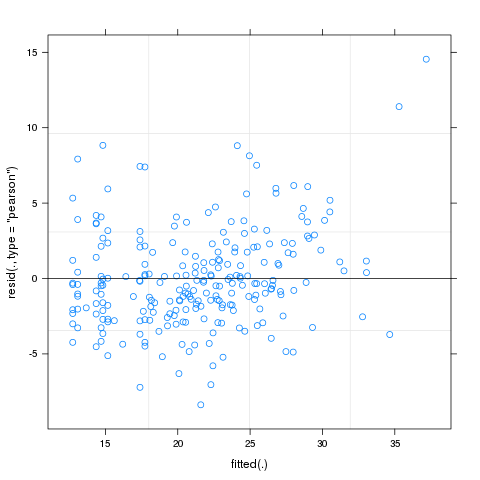

In [8]:
%%R
m = lmer(BX_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         anova(m, ddf="Kenward-Roger", type=3) %>% print
        

# test interaction to allow for post hoc tests
Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m1 = lmer(BX_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
          m1.cld = cld(m1.glht, level = 0.05)
        m1.cld %>% print
        

plot(m)

In [9]:
%%R
# model 
m = lmer(CB_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
        
         anova(m, ddf="Kenward-Roger", type=3) %>% print

# model interaction for post-hoc tests
m1 = lmer(CB_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)

      
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
  
        m1.cld = cld(m1.glht, level = 0.05)
        m1.cld
        

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                   Sum Sq Mean Sq NumDF   DenDF F.value    Pr(>F)    
Planted           279.861 279.861     1  42.544 20.0037 5.667e-05 ***
Treatment          73.652  73.652     1 146.614  5.2644  0.023185 *  
Planted:Treatment 145.883 145.883     1 146.614 10.4274  0.001532 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Bare Soil-Nneg   Bare Soil-Npos Rhizosphere-Nneg Rhizosphere-Npos 
             "a"              "a"              "b"              "c" 


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                  Sum Sq Mean Sq NumDF   DenDF F.value   Pr(>F)   
Planted           1958.8  1958.8     1  46.527  4.6462 0.036328 * 
Treatment         3248.0  3248.0     1 146.501  7.7042 0.006229 **
Planted:Treatment    9.3     9.3     1 146.501  0.0221 0.881998   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Bare Soil-Nneg   Bare Soil-Npos Rhizosphere-Nneg Rhizosphere-Npos 
             "a"             "ab"              "a"              "b" 


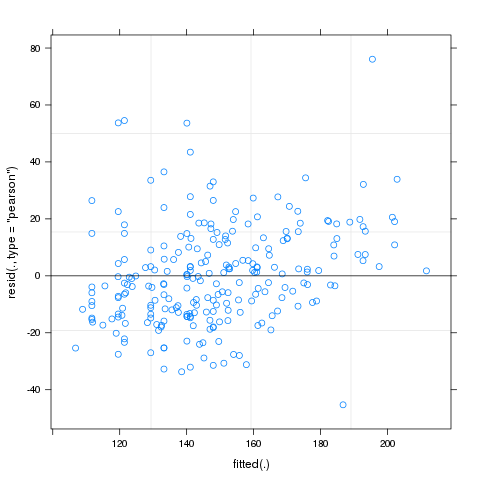

In [10]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(LAP_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
    
    anova(m, ddf="Kenward-Roger", type=3) %>% print

 
m1 = lmer(LAP_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
        

        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
    
m1.cld = cld(m1.glht, level = 0.05)
m1.cld %>% print

plot(m)


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                  Sum Sq Mean Sq NumDF   DenDF F.value   Pr(>F)   
Planted           59.651  59.651     1  43.815  9.2555 0.003958 **
Treatment          8.259   8.259     1 146.528  1.2815 0.259465   
Planted:Treatment 41.918  41.918     1 146.528  6.5041 0.011789 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Bare Soil-Nneg   Bare Soil-Npos Rhizosphere-Nneg Rhizosphere-Npos 
            "ab"              "a"              "b"              "c" 


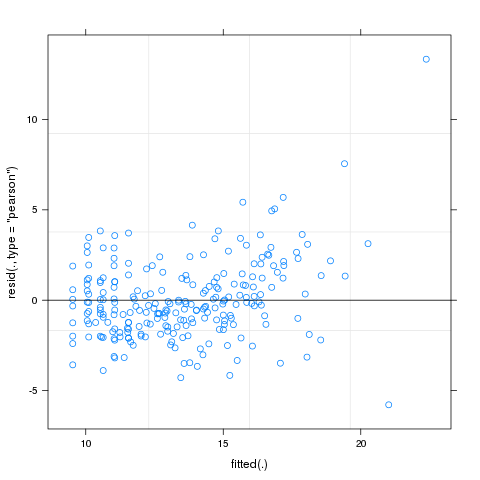

In [11]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(NAG_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
m1 = lmer(NAG_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
    
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
        summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
m1.cld %>% print
m1.cld
plot(m)

# Graph enzyme activity in bare vs rhizosphere soils

In [12]:
%%R
#calculate means of Bare soil vs Planted treatments

by_treat = group_by(Enz, Planted, Treatment)
Emeans = summarize(by_treat,
              N = length(BX_activity_g),
                   bx.m = mean(BX_activity_g),
                   bx.se = sd(BX_activity_g)/sqrt(length(BX_activity_g)),
                  cb.m = mean(CB_activity_g),
                   cb.se = sd(CB_activity_g)/sqrt(length(CB_activity_g)),
                  lap.m = mean(LAP_activity_g),
                   lap.se = sd(LAP_activity_g)/sqrt(length(LAP_activity_g)),
                    nag.m = mean(NAG_activity_g),
                  nag.se = sd(NAG_activity_g)/sqrt(length(NAG_activity_g)))
head(Emeans) %>% print

Source: local data frame [4 x 11]
Groups: Planted [2]

      Planted Treatment     N     bx.m     bx.se     cb.m     cb.se    lap.m
       <fctr>    <fctr> <int>    <dbl>     <dbl>    <dbl>     <dbl>    <dbl>
1   Bare Soil      Nneg    32 15.17175 0.6498354 14.29288 0.5461105 126.6001
2   Bare Soil      Npos    32 14.82994 0.7252128 13.78256 0.5471938 134.4734
3 Rhizosphere      Nneg    88 22.32679 0.5840031 20.95171 0.5609904 150.1426
4 Rhizosphere      Npos    88 24.84942 0.6868409 23.96746 0.6087010 158.9072
# ... with 3 more variables: lap.se <dbl>, nag.m <dbl>, nag.se <dbl>


In [13]:
%%R
#Emeans %>% melt(idvars = c("Planted", "Treatment", "N"))

BXmeans = Emeans %>% select(Planted, Treatment, N, bx.m, bx.se)
BXmeans$Enzyme = "BX"
colnames(BXmeans)[4:5] = c("mean", "se")

CBmeans = Emeans %>% select(Planted, Treatment, N, cb.m, cb.se)
CBmeans$Enzyme = "CB"
colnames(CBmeans)[4:5] = c("mean", "se")

LAPmeans = Emeans %>% select(Planted, Treatment, N, lap.m, lap.se)
LAPmeans$Enzyme = "LAP"
colnames(LAPmeans)[4:5] = c("mean", "se")

NAGmeans = Emeans %>% select(Planted, Treatment, N, nag.m, nag.se)
NAGmeans$Enzyme = "NAG"
colnames(NAGmeans)[4:5] = c("mean", "se")

Emeans.l = rbind(BXmeans, CBmeans, LAPmeans, NAGmeans)
print(Emeans.l, n = 16)

Source: local data frame [16 x 6]
Groups: Planted [2]

       Planted Treatment     N      mean        se Enzyme
        <fctr>    <fctr> <int>     <dbl>     <dbl>  <chr>
1    Bare Soil      Nneg    32  15.17175 0.6498354     BX
2    Bare Soil      Npos    32  14.82994 0.7252128     BX
3  Rhizosphere      Nneg    88  22.32679 0.5840031     BX
4  Rhizosphere      Npos    88  24.84942 0.6868409     BX
5    Bare Soil      Nneg    32  14.29288 0.5461105     CB
6    Bare Soil      Npos    32  13.78256 0.5471938     CB
7  Rhizosphere      Nneg    88  20.95171 0.5609904     CB
8  Rhizosphere      Npos    88  23.96746 0.6087010     CB
9    Bare Soil      Nneg    32 126.60010 4.3541236    LAP
10   Bare Soil      Npos    32 134.47341 4.4363541    LAP
11 Rhizosphere      Nneg    88 150.14261 3.3174157    LAP
12 Rhizosphere      Npos    88 158.90724 3.4144836    LAP
13   Bare Soil      Nneg    32  10.82401 0.3435123    NAG
14   Bare Soil      Npos    32  10.29845 0.3612938    NAG
15 Rhizosphere   

In [14]:
%%R
# add posthoc tests to dataframe
Emeans.l$labs = c("a", "a", "b", "c", "a", "a", "b", "c", "a", "ab", "a", "b",  "ab", "a", "b", "c")
head(Emeans.l)

Source: local data frame [6 x 7]
Groups: Planted [2]

      Planted Treatment     N     mean        se Enzyme  labs
       <fctr>    <fctr> <int>    <dbl>     <dbl>  <chr> <chr>
1   Bare Soil      Nneg    32 15.17175 0.6498354     BX     a
2   Bare Soil      Npos    32 14.82994 0.7252128     BX     a
3 Rhizosphere      Nneg    88 22.32679 0.5840031     BX     b
4 Rhizosphere      Npos    88 24.84942 0.6868409     BX     c
5   Bare Soil      Nneg    32 14.29288 0.5461105     CB     a
6   Bare Soil      Npos    32 13.78256 0.5471938     CB     a


In [15]:
%%R
# set theme
theme_pubdbl = function (base_size = 22, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            line = element_line(colour = "black", size = 1, linetype = 1, 
            lineend = "butt"), 
            rect = element_rect(fill = "white", colour = "black", size = 1, linetype = 1), 
            text = element_text(family = base_family, face = "plain", 
                                colour = "black", size = base_size, lineheight = 0.9, 
                                hjust = 0.5, vjust = 0.5, angle = 0, margin = margin(), 
                                debug = FALSE),

            axis.line.x = element_line(size = 1),
            axis.line.y = element_line(size = 1),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black"), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
}


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Ignoring unknown aesthetics: y

  warnings.warn(x, RRuntimeWarning)


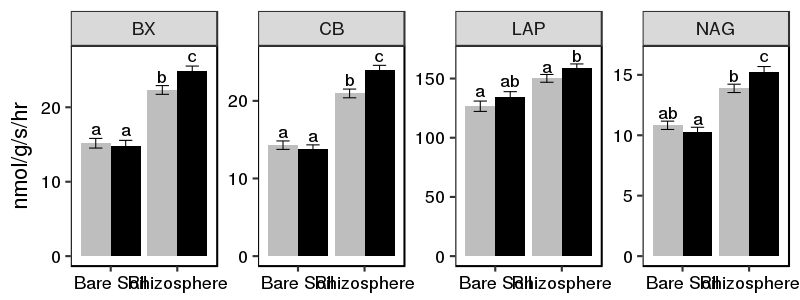

In [16]:
%%R -w 800 -h 300

dodge = position_dodge(width=0.9)
P1 = ggplot(Emeans.l, aes(x = Planted, y = mean, fill = Treatment), color = black) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity", position = dodge) + 
        geom_errorbar(aes(y = mean,
                  ymin = mean - se, ymax = mean + se),position=dodge, width = 0.4)+
        ylab("nmol/g/s/hr")+
        theme_pubdbl()+
        theme(axis.title.x = element_blank(),
             axis.text = element_text(colour = "black")) +
        facet_wrap(~ Enzyme, scales = "free_y", ncol = 4)+
        theme(legend.position="none") +
        geom_text(aes(y = mean + 3*se, label=labs), size = 6, position = dodge)
P1    



In [17]:
%%R
pdf(file = "/home/bryan/RhizCG/figures/ms_figures/enzyme_rhizosphere_xTreatment.pdf", height = 5, width = 14.18)
P1 %>% print
dev.off()

png 
  2 


# Model covariates with rhizosphere effect

## Is fertilizer effect correlated with inorganic N or plant growth
* control for plant and test growth residuals and inorganic N concentration

In [18]:
%%R
#remove outlier in inorganic N
data = filter(Enz, InorganicN < 45) %>% filter(Plant != "BARE")

In [19]:
%%R
library("MuMIn")

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
           Sum Sq Mean Sq NumDF  DenDF F.value    Pr(>F)    
Plant      939.69  93.969    10 30.621  4.6838 0.0004427 ***
InorganicN 236.40 236.401     1 67.155 11.7832 0.0010277 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


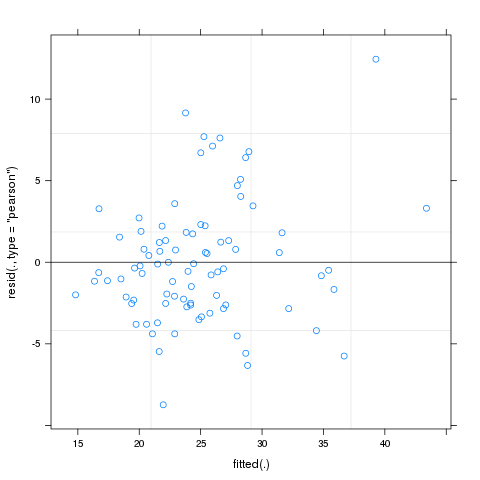

In [21]:
%%R
m = lmer(formula = BX_activity_g ~ Plant +  InorganicN + 
    (1 | Rep) + (1|Rep:Plant), data = data)
anova(m, ddf="Kenward-Roger", type=3) %>% print
plot(m)



Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
           Sum Sq Mean Sq NumDF  DenDF F.value   Pr(>F)   
Plant      861.13  86.113    10 30.252  3.7761 0.002220 **
InorganicN 210.12 210.120     1 70.863  9.2139 0.003358 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


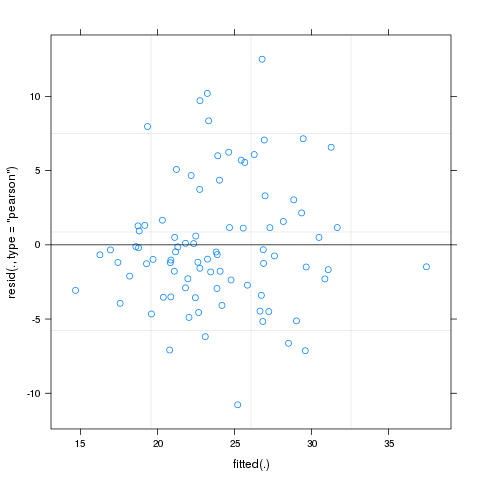

In [22]:
%%R
m = lmer(formula = CB_activity_g ~ Plant + InorganicN + 
    (1 | Rep) + (1|Rep:Plant), data = data)
anova(m, ddf="Kenward-Roger", type=3) %>% print
plot(m)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
            Sum Sq Mean Sq NumDF  DenDF F.value    Pr(>F)    
Plant      24509.2  2450.9    10 30.752  8.0379 3.349e-06 ***
InorganicN  7451.3  7451.3     1 62.830 24.4367 6.017e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


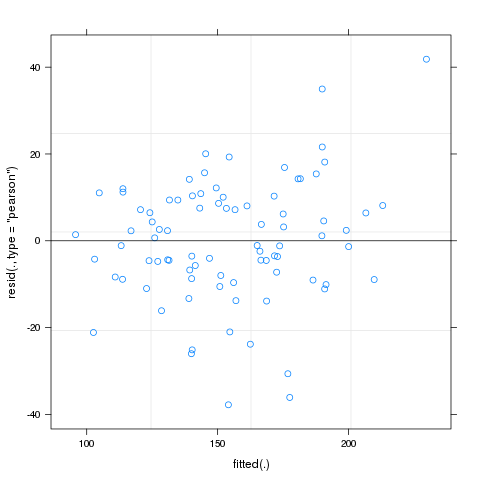

In [23]:
%%R
m = lmer(formula = LAP_activity_g ~ Plant + InorganicN + 
    (1 | Rep) + (1|Rep:Plant), data = data)
anova(m, ddf="Kenward-Roger", type=3) %>% print
plot(m)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
            Sum Sq Mean Sq NumDF  DenDF F.value    Pr(>F)    
Plant      204.986  20.499    10 30.652  3.2683 0.0055589 ** 
InorganicN  79.425  79.425     1 67.126 12.6634 0.0006901 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


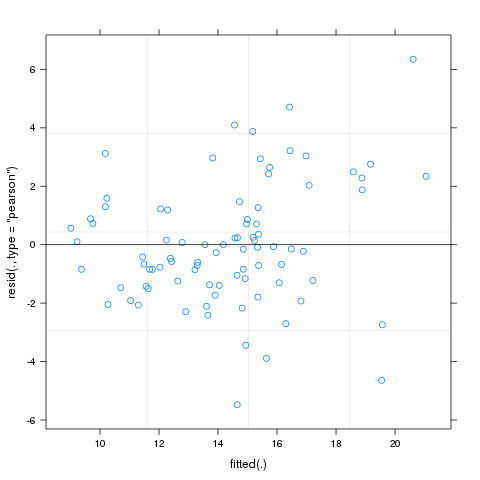

In [24]:
%%R
m = lmer(formula = NAG_activity_g ~ Plant + InorganicN + 
    (1 | Rep) + (1|Rep:Plant), data = data)
anova(m, ddf="Kenward-Roger", type=3) %>% print
plot(m)

# Enzyme activity over time

In [99]:
%%R
EnzDate = Enz %>%
    group_by(DAP, Plant, Treatment) %>%
   summarize(N = length(BX_activity_g),
                   bx.m = mean(BX_activity_g),
                   bx.se = sd(BX_activity_g)/sqrt(length(BX_activity_g)),
                  cb.m = mean(CB_activity_g),
                   cb.se = sd(CB_activity_g)/sqrt(length(CB_activity_g)),
                  lap.m = mean(LAP_activity_g),
                   lap.se = sd(LAP_activity_g)/sqrt(length(LAP_activity_g)),
                    nag.m = mean(NAG_activity_g),
                  nag.se = sd(NAG_activity_g)/sqrt(length(NAG_activity_g))) 
    

In [100]:
%%R
head(EnzDate)

Source: local data frame [6 x 12]
Groups: DAP, Plant [3]

    DAP  Plant Treatment     N     bx.m    bx.se     cb.m    cb.se    lap.m
  <int> <fctr>    <fctr> <int>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>
1    36   BARE      Nneg     4 21.50868 1.320689 20.51567 1.460107 115.3137
2    36   BARE      Npos     4 21.27722 1.730988 18.32921 1.960961 133.7975
3    36  FAGES      Nneg     4 31.35908 1.234949 28.63453 1.742390 153.4345
4    36  FAGES      Npos     4 41.65411 4.480858 33.80373 2.029174 201.0376
5    53  AMAPO      Nneg     4 26.24958 3.884657 25.22104 3.175429 142.6162
6    53  AMAPO      Npos     4 25.75235 2.100493 25.93290 2.231025 147.6012
# ... with 3 more variables: lap.se <dbl>, nag.m <dbl>, nag.se <dbl>


In [101]:
%%R
#Emeans %>% melt(idvars = c("Planted", "Treatment", "N"))

BXmeans = EnzDate %>% select(Plant, Treatment, DAP, bx.m, bx.se)
BXmeans$Enzyme = "BX"
colnames(BXmeans)[4:5] = c("mean", "se")

CBmeans = EnzDate %>% select(Plant, Treatment, DAP, cb.m, cb.se)
CBmeans$Enzyme = "CB"
colnames(CBmeans)[4:5] = c("mean", "se")

LAPmeans = EnzDate %>% select(Plant, Treatment, DAP, lap.m, lap.se)
LAPmeans$Enzyme = "LAP"
colnames(LAPmeans)[4:5] = c("mean", "se")

NAGmeans = EnzDate %>% select(Plant, Treatment, DAP, nag.m, nag.se)
NAGmeans$Enzyme = "NAG"
colnames(NAGmeans)[4:5] = c("mean", "se")

Emeans.Date = rbind(BXmeans, CBmeans, LAPmeans, NAGmeans)
print(Emeans.Date, n = 16)

Source: local data frame [240 x 6]
Groups: DAP, Plant [30]

    Plant Treatment   DAP     mean        se Enzyme
   <fctr>    <fctr> <int>    <dbl>     <dbl>  <chr>
1    BARE      Nneg    36 21.50868 1.3206891     BX
2    BARE      Npos    36 21.27722 1.7309880     BX
3   FAGES      Nneg    36 31.35908 1.2349495     BX
4   FAGES      Npos    36 41.65411 4.4808582     BX
5   AMAPO      Nneg    53 26.24958 3.8846571     BX
6   AMAPO      Npos    53 25.75235 2.1004927     BX
7    BARE      Nneg    53 14.70465 1.4524397     BX
8    BARE      Npos    53 14.94756 1.0170141     BX
9   ECHCG      Nneg    53 21.21926 0.8446133     BX
10  ECHCG      Npos    53 26.06625 0.8926845     BX
11  ABUTH      Nneg    57 17.73023 1.9796636     BX
12  ABUTH      Npos    57 27.54819 3.5647426     BX
13   BARE      Nneg    57 11.13779 0.7898883     BX
14   BARE      Npos    57 10.46599 0.2922629     BX
15  GLYMA      Nneg    57 19.60975 1.5292316     BX
16  GLYMA      Npos    57 20.58968 1.5632229     BX
# ..

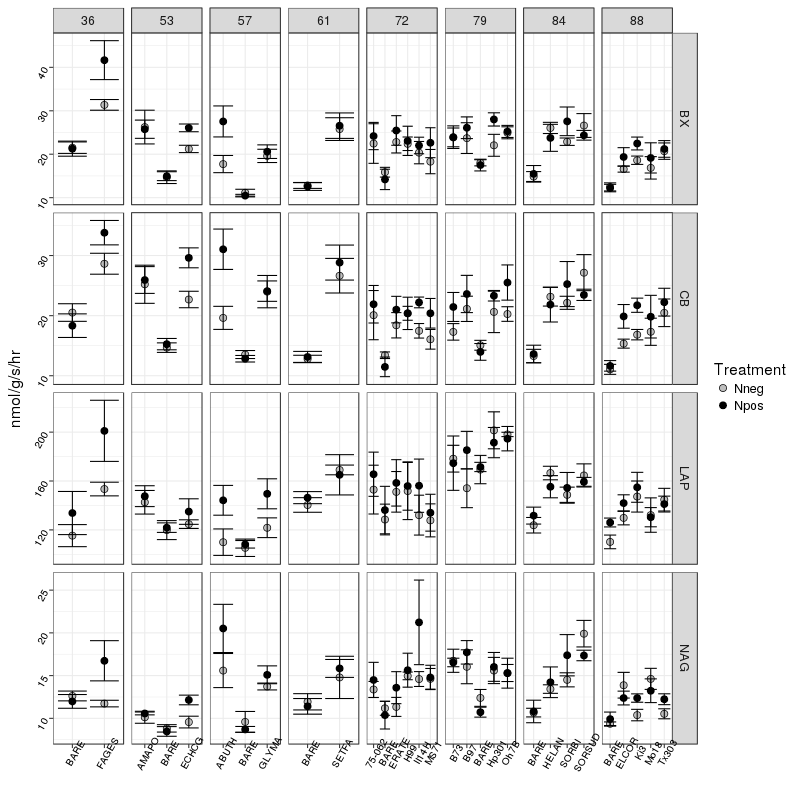

In [102]:
%%R -w 800 -h 800

dodge = position_dodge(width=0.4)
P2 = ggplot(filter(Emeans.Date), aes(x = Plant, y = mean, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_point(size = 3,  pch = 21) +
        #geom_bar(stat = "identity", position = dodge) + 
        geom_errorbar(aes(y = mean,
                  ymin = mean - se, ymax = mean + se))+
        ylab("nmol/g/s/hr")+
        #ggtitle("BX") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank(),
             axis.text = element_text(colour = "black", size = 10, angle = 60)) +
        #theme(axis.title.y = element_blank()) +
        facet_grid(Enzyme~ DAP, scales = "free")
        #theme(legend.position="none") 
        #geom_text(aes(y = mean + 3*se, label=labs), position = dodge)
P2    

# Are there significant differences in rhizosphere effect between plants harvested on the same date?

In [103]:
%%R
data = Enz %>% filter(Plant != "BARE")

### Day 53, AMAPO and ECHCG

In [104]:
%%R
Day53 = filter(data, DAP == 53, TRUE)
List = c("BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g")

for (i in List) {
m = lmer(get(i) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Day53)
        print(paste(i))
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
    }

[1] "BX_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant           15.748  15.748     1     3  1.1428 0.3634
Treatment       18.920  18.920     1     6  1.3731 0.2857
Plant:Treatment 28.561  28.561     1     6  2.0727 0.2000
[1] "CB_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant            1.059   1.059     1     3  0.1626 0.71377  
Treatment       58.444  58.444     1     6  8.9751 0.02414 *
Plant:Treatment 38.703  38.703     1     6  5.9435 0.05061 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "LAP_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant           551.78  551.78     1     

## Day 57 ABUTH and GLYMA

In [105]:
%%R
DaySub = filter(data, DAP == 57, TRUE)
List = c("BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g")

for (i in List) {
m = lmer(get(i) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = DaySub)
        print(paste(i))
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
    }

[1] "BX_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant            22.942  22.942     1     3  1.1383 0.36425  
Treatment       116.594 116.594     1     6  5.7849 0.05292 .
Plant:Treatment  78.111  78.111     1     6  3.8755 0.09653 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "CB_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant             6.76    6.76     1     3  0.2697 0.63941  
Treatment       132.27  132.27     1     6  5.2772 0.06133 .
Plant:Treatment 128.45  128.45     1     6  5.1249 0.06421 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "LAP_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum

## Day 72 75-062,  ERATE, H99,  Il14H,  MS71  

In [106]:
%%R
DaySub = filter(data, DAP == 72, TRUE)
List = c("BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g")

for (i in List) {
m = lmer(get(i) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = DaySub)
        print(paste(i))
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
    }

[1] "BX_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value   Pr(>F)   
Plant           24.289   6.072     4    12  1.1365 0.385411   
Treatment       48.764  48.764     1    15  9.1268 0.008596 **
Plant:Treatment 15.373   3.843     4    15  0.7193 0.591890   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "CB_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value   Pr(>F)   
Plant           12.036   3.009     4    12  0.4413 0.776618   
Treatment       72.472  72.472     1    15 10.6298 0.005271 **
Plant:Treatment 29.833   7.458     4    15  1.0939 0.395012   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "LAP_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       

## Day 79 B73 B97 Hp301 Oh7B 

In [107]:
%%R
DaySub = filter(data, DAP == 79, TRUE)
List = c("BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g")

for (i in List) {
 m = lmer(get(i) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
           data = DaySub)
 
        print(paste(i))
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
    }

[1] "BX_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)  
Plant            1.862   0.621     3     9  0.0731 0.9729  
Treatment       37.029  37.029     1    12  4.3632 0.0587 .
Plant:Treatment 45.532  15.177     3    12  1.7883 0.2029  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "CB_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant            49.384  16.461     3     9  0.8116 0.51888  
Treatment       105.874 105.874     1    12  5.2198 0.04133 *
Plant:Treatment  10.151   3.384     3    12  0.1668 0.91669  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "LAP_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq

## Day 84 HELAN SORBI SORSUD

In [108]:
%%R
DaySub = filter(data, DAP == 84, TRUE)
List = c("BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g")

for (i in List) {
m = lmer(get(i) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = DaySub)
        print(paste(i))
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
    }

[1] "BX_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant            0.718   0.359     2     6 0.02431 0.9761
Treatment        0.018   0.018     1     9 0.00125 0.9726
Plant:Treatment 64.467  32.234     2     9 2.18278 0.1687
[1] "CB_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant           21.563 10.7813     2     6 0.55750 0.5997
Treatment        2.365  2.3646     1     9 0.12228 0.7346
Plant:Treatment 47.752 23.8762     2     9 1.23464 0.3359
[1] "LAP_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant           523.28 261.640     2     6 1.23600 0.3552
Treatment        77.69  77.688     1     9 0.36700 0.5596
Plant:T

## Day 88 ELCOR  Ki3  Mo18  Tx303  

In [109]:
%%R
DaySub = filter(data, DAP == 88, TRUE)
List = c("BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g")

for (i in List) {
m = lmer(get(i) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = DaySub)
        print(paste(i))
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
    }

[1] "BX_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)  
Plant           55.483  18.494     3     9  1.3585 0.3163  
Treatment       44.751  44.751     1    12  3.2872 0.0949 .
Plant:Treatment 11.740   3.913     3    12  0.2875 0.8336  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "CB_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant           45.513  15.171     3     9  1.1832 0.36956  
Treatment       94.046  94.046     1    12  7.3350 0.01901 *
Plant:Treatment 13.966   4.655     3    12  0.3631 0.78087  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "LAP_activity_g"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mea

* plant genotpye has a marginally significant effect on NAG activity on one date; however, would not remain so if corrected for multiple comparisons

# Session info

In [110]:
%%R
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu precise (12.04.5 LTS)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] MuMIn_1.15.6    dplyr_0.5.0     reshape2_1.4.2  vegan_2.4-1    
 [5] lattice_0.20-34 permute_0.9-4   multcomp_1.4-6  TH.data_1.0-7  
 [9] MASS_7.3-45     survival_2.40-1 mvtnorm_1.0-5   gridExtra_2.2.1
[13] pbkrtest_0.4-6  ggplot2_2.2.0   lmerTest_2.0-33 lme4_1.1-12    
[17] Matrix_1.2-7.1 

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.5         nloptr_1.0.4        